Author: Efren Del Real Frias  
FileName: 01_Introduction.ipynb  
Date: June 05 th 2022

# 0.- Import Python Modules

In [1]:
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt

# 1.- Finding Key Connectors

In [2]:
users = [
    {"id": 0, "name": "Hero"},
    {"id": 1, "name": "Dunn"},
    {"id": 2, "name": "Sue"},
    {"id": 3, "name": "Chi"},
    {"id": 4, "name": "Thor"},
    {"id": 5, "name": "Clive"},
    {"id": 6, "name": "Hicks"},
    {"id": 7, "name": "Davin"},
    {"id": 8, "name": "Kate"},
    {"id": 9, "name": "Klein"}
]

In [3]:
friendship_pairs = [
    (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)
]

In [4]:
# Initialize the dict with an empty list for each user id
friendships = {user['id'] : [] for user in users}
friendships

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}

In [5]:
# And loop over the friendship pairs to pupulate it
for i, j in friendship_pairs:
    friendships[i].append(j)
    friendships[j].append(i)

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

In [6]:
def number_of_friend(user) -> int:
    """
        Gets total of user  friends
    """
    return len(friendships[user['id']])

In [7]:
total_connections : int = sum(number_of_friend(user) for user in users)
total_connections

24

In [8]:
num_users : int = len(users)
avg_connections : float = total_connections / num_users
avg_connections

2.4

In [9]:
# Create a list (user_id, number_of_firneds)
num_friends_by_id = [ ( user['id'], number_of_friend(user) ) 
                        for user in users ]
num_friends_by_id

[(0, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (4, 2),
 (5, 3),
 (6, 2),
 (7, 2),
 (8, 3),
 (9, 1)]

In [10]:
# sort the list by num_friend largest to smallest
num_friends_by_id.sort(
    key=lambda id_and_friends: id_and_friends[1],
    reverse=True
)
num_friends_by_id

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

# 2.- Data Scientist You May Know

In [11]:
def foaf_ids_bad(user):
    """
        foaf is short for "friend of a friend"
    """
    return [foaf_id
            for friend_id in friendships[user['id']]
            for foaf_id in friendships[friend_id]]

In [12]:
foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

In [13]:
print(friendships[0])
print(friendships[1])
print(friendships[2])

[1, 2]
[0, 2, 3]
[0, 1, 3]


In [14]:
def friends_of_friends(user):
    """
    """
    user_id : int = user['id']

    return Counter(
        foaf_id
        for friend_id in friendships[user_id]
        for foaf_id in friendships[friend_id]
        if foaf_id != user_id
        and foaf_id not in friendships[user_id]
    )

In [15]:
friends_of_friends(users[3])

Counter({0: 2, 5: 1})

In [16]:
interests = [
    (0, 'Hadoop'), (0, 'Big Data'), (0, 'HBase'), (0, 'Java'), (0, 'Spark'), (0, 'Storm'), (0, 'Cassandra'),
    (1, 'NoSQL'), (1, 'MongoDB'), (1, 'Cassandra'), (1, 'HBase'), (1, 'Postgres'),
    (2, 'Python'), (2, 'scikit-learn'), (2, 'scipy'),(2, 'numpy'), (2, 'statsmodels'), (2, 'pandas'),
    (3, 'R'), (3, 'Python'), (3, 'statistics'), (3, 'regression'), (3, 'probability'), 
    (4, 'machine learning'), (4, 'regression'), (4, 'desision trees'), (4, 'libsvm'),
    (5, 'Python'), (5, 'R'),  (5, 'Java'), (5, 'C++'), (5, 'Haskell'), (5, 'programing languages'),
    (6, 'statistics'), (6, 'probability'), (6, 'mathematics'), (6, 'theory'), 
    (7, 'machine learning'),(7, 'scikit-learn'), (7, 'Mahout'), (7, 'neural networks'),
    (8, 'neural networks'),(8, 'deep learning'), (8, 'Big Data'), (8, 'artificial intelligence'),
    (9, 'Hadoop'), (9, 'Java'), (9, 'MapReduce'), (9, 'Big Data')
]

In [17]:
def data_scients_who_like(target_interest : str):
    """
        Gets a list of ids of all users who like target interest.
    """

    return [user_id
            for user_id, user_interest in interests
            if user_interest == target_interest]

In [18]:
data_scients_who_like('Big Data')

[0, 8, 9]

In [19]:
# Keys are interest, values are list of user_ids with that interest
user_ids_by_interest = defaultdict(list)
user_ids_by_interest

defaultdict(list, {})

In [20]:
for user_id, interest in interests:
    user_ids_by_interest[interest].append(user_id)
    
user_ids_by_interest

defaultdict(list,
            {'Hadoop': [0, 9],
             'Big Data': [0, 8, 9],
             'HBase': [0, 1],
             'Java': [0, 5, 9],
             'Spark': [0],
             'Storm': [0],
             'Cassandra': [0, 1],
             'NoSQL': [1],
             'MongoDB': [1],
             'Postgres': [1],
             'Python': [2, 3, 5],
             'scikit-learn': [2, 7],
             'scipy': [2],
             'numpy': [2],
             'statsmodels': [2],
             'pandas': [2],
             'R': [3, 5],
             'statistics': [3, 6],
             'regression': [3, 4],
             'probability': [3, 6],
             'machine learning': [4, 7],
             'desision trees': [4],
             'libsvm': [4],
             'C++': [5],
             'Haskell': [5],
             'programing languages': [5],
             'mathematics': [6],
             'theory': [6],
             'Mahout': [7],
             'neural networks': [7, 8],
             'deep learning': [

In [21]:
# Keys are user_ids, values are lisr of interest for that user_id
interest_by_user_id = defaultdict(list)

for user_id, interest in interests:
    interest_by_user_id[user_id].append(interest)

interest_by_user_id

defaultdict(list,
            {0: ['Hadoop',
              'Big Data',
              'HBase',
              'Java',
              'Spark',
              'Storm',
              'Cassandra'],
             1: ['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres'],
             2: ['Python',
              'scikit-learn',
              'scipy',
              'numpy',
              'statsmodels',
              'pandas'],
             3: ['R', 'Python', 'statistics', 'regression', 'probability'],
             4: ['machine learning', 'regression', 'desision trees', 'libsvm'],
             5: ['Python',
              'R',
              'Java',
              'C++',
              'Haskell',
              'programing languages'],
             6: ['statistics', 'probability', 'mathematics', 'theory'],
             7: ['machine learning',
              'scikit-learn',
              'Mahout',
              'neural networks'],
             8: ['neural networks',
              'deep learning',
        

In [22]:
def most_common_interests_with(user):
    """
    """

    return Counter(
        interested_user_id
        for interest in interest_by_user_id[user['id']]
        for interested_user_id in user_ids_by_interest[interest]
        if interested_user_id != user['id']
    )

In [23]:
most_common_interests_with(users[6])

Counter({3: 2})

# 3.- Salaries and Experience

In [24]:
salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6.0),
                        (69000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10.0),
                        (48000, 1.9), (63000, 4.2)]

Text(0, 0.5, 'Salary')

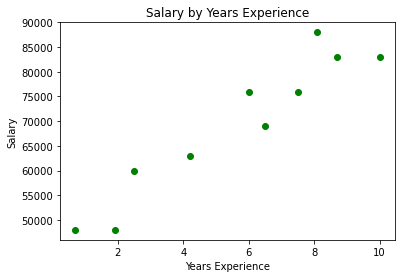

In [25]:
# Split data into list
ltsSalary = [x[0] for x in salaries_and_tenures]
ltsExperience = [x[1] for x in salaries_and_tenures]

# Plot data
plt.scatter( ltsExperience, ltsSalary, color='green')
plt.title('Salary by Years Experience')
plt.xlabel('Years Experience')
plt.ylabel('Salary')

In [26]:
# Keys are years, values are list of the salaries for each tenure
salary_by_tenure = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    salary_by_tenure[tenure].append(salary)

salary_by_tenure

defaultdict(list,
            {8.7: [83000],
             8.1: [88000],
             0.7: [48000],
             6.0: [76000],
             6.5: [69000],
             7.5: [76000],
             2.5: [60000],
             10.0: [83000],
             1.9: [48000],
             4.2: [63000]})

In [27]:
# Keys are years, each value is average for that tenure
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}
average_salary_by_tenure

{8.7: 83000.0,
 8.1: 88000.0,
 0.7: 48000.0,
 6.0: 76000.0,
 6.5: 69000.0,
 7.5: 76000.0,
 2.5: 60000.0,
 10.0: 83000.0,
 1.9: 48000.0,
 4.2: 63000.0}

In [28]:
def tenure_bucket(tenure:float)-> str:
    if tenure < 2:
        return "less than two"
    elif tenure < 5:
        return "between two and five"
    else:
        return "more than five"

In [29]:
# keys are tenure buckets, velues are list of salaries for that bucket.
salary_by_tenure_bucket = defaultdict(list)

for salary, tenure in salaries_and_tenures:
    bucket = tenure_bucket(tenure)
    salary_by_tenure_bucket[bucket].append(salary)

salary_by_tenure_bucket

defaultdict(list,
            {'more than five': [83000, 88000, 76000, 69000, 76000, 83000],
             'less than two': [48000, 48000],
             'between two and five': [60000, 63000]})

In [30]:
# Keys are tenure buckets , values are average salary for that bucket
average_salary_by_bucket = {
    str_tenure_bucket : sum(salaries) / len(salaries)
    for str_tenure_bucket, salaries in salary_by_tenure_bucket.items()
}

average_salary_by_bucket

{'more than five': 79166.66666666667,
 'less than two': 48000.0,
 'between two and five': 61500.0}